In [7]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# 建立 CNN 模型
model = Sequential()

# 第一層卷積層：使用 32 個 10x10 的卷積濾波器，激活函數為 ReLU
model.add(Conv2D(filters=32, kernel_size=(10, 10), input_shape=(28, 28, 1), activation='relu'))

# 第一層池化層：使用 4x4 的池化窗口來減少特徵圖大小，減少計算量
model.add(MaxPooling2D(pool_size=(4, 4)))

# 展平層：將多維特徵圖展平成一維向量，為全連接層做準備
model.add(Flatten())

# 輸出層：10 個神經元對應 0-9 的數字分類，使用 softmax 激活函數
model.add(Dense(10, activation='softmax'))

# 查看模型結構
model.summary()

# 編譯模型
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 19, 19, 32)          │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,362 (32.66 KB)

 Trainable params: 8,362 (32.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 載入 MNIST 手寫數字資料集
mnist = keras.datasets.mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()

test_label_original = test_label

# 將(train)訓練和(test)測試標籤轉為 one-hot 編碼格式，以便用於模型的分類輸出
train_label = to_categorical(train_label)  # 將(train_label)訓練標籤轉為 one-hot 編碼格式
test_label = to_categorical(test_label)    # 將(test_label)測試標籤轉為 one-hot 編碼格式


In [10]:
# 訓練模型
train_history = model.fit(
    train_data,          # 訓練影像數據
    train_label,         # one-hot 編碼的訓練標籤
    epochs=20,           # 訓練週期數，模型會遍歷訓練數據集 20 次
    batch_size=1024       # 每批次訓練的樣本數，設置為 1024
)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4633 - loss: 24.0748
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8622 - loss: 1.6665
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9295 - loss: 0.5738
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9486 - loss: 0.3229
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9579 - loss: 0.2239
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9702 - loss: 0.1436
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9737 - loss: 0.1191
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9788 - loss: 0.0941
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9810 - loss: 0.0818
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9811 - loss: 0.0797
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9844 - loss: 0.0657
Epoch 12/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9838 - 

In [11]:
# 評估模型性能
score = model.evaluate(test_data, test_label)

# 輸出測試集的準確率
print("測試準確率:", score[1])  # score[1] 代表準確率

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9764 - loss: 0.1665
測試準確率: 0.9822999835014343


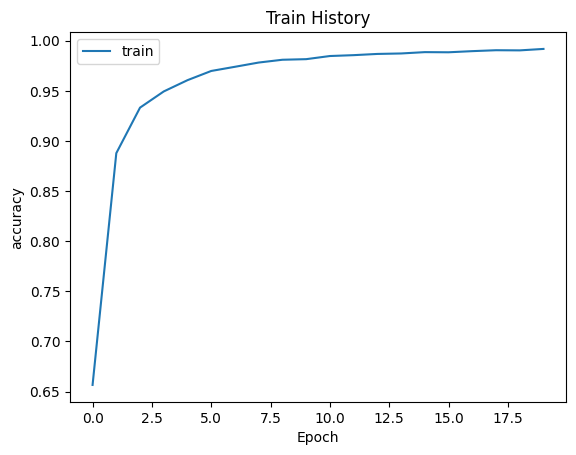

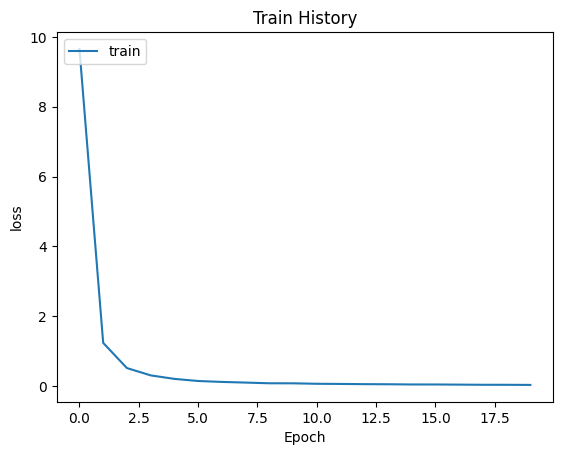

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
測試標籤形狀: (10000, 10)
Predicted    0     1     2    3    4    5    6     7    8    9
Actual                                                        
0          975     0     1    0    0    1    1     0    1    1
1            0  1130     3    0    0    0    2     0    0    0
2            2     3  1017    0    0    0    0     7    3    0
3            0     1     3  998    0    4    0     1    3    0
4            0     0     1    1  969    0    5     0    2    4
5            3     0     0   14    0  868    1     2    3    1
6            4     2     1    1    4    4  938     0    4    0
7            1    11     7    0    1    1    0  1001    4    2
8            4     0     6    3    1    1    0     3  951    5
9            1     2     1    5    8    1    0     7    8  976


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 繪製訓練歷史的函數
def show_train_history(train_history, train, validation):
    # 繪製訓練與驗證準確率或損失值
    plt.plot(train_history.history[train])          # 繪製訓練準確率或損失
    if validation in train_history.history:
        plt.plot(train_history.history[validation])  # 如果驗證資料存在，則繪製驗證準確率或損失
    plt.title('Train History')                       # 圖表標題
    plt.ylabel(train)                                # Y 軸標籤
    plt.xlabel('Epoch')                              # X 軸標籤
    plt.legend(['train', 'validation'] if validation in train_history.history else ['train'], loc='upper left')  # 圖例位置
    plt.show()                                       # 顯示圖表

# 繪製準確率與損失值的歷史圖
show_train_history(train_history, 'accuracy', 'val_accuracy')  # 應使用 'val_accuracy' 繪製驗證準確率
show_train_history(train_history, 'loss', 'val_loss')          # 應使用 'val_loss' 繪製驗證損失

# 計算混淆矩陣
prediction = model.predict(test_data)                          # 使用模型對測試數據進行預測
prediction_label = np.argmax(prediction, axis=1)               # 獲取預測標籤，使用 argmax 找到每行的最大值索引
print("測試標籤形狀:", test_label.shape)                      # 輸出測試標籤的形狀

# 使用 pandas 繪製混淆矩陣
confusion_matrix = pd.crosstab(test_label_original, prediction_label, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)                                        # 顯示混淆矩陣
                                        # 顯示混淆矩陣
